## MS SQL Database

#### using Pyodbc

In [2]:
import pandas as pd
import numpy as np
import pyodbc
import warnings

warnings.filterwarnings("ignore")


In [3]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 17 for SQL Server',
 'Oracle in OracleClient19Home1_64bits',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [4]:
import pyodbc
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=na0vm00024.apac.bosch.com;"
                        "Database=DB_MFC2DB_SQL;"
                        "Trusted_Connection=yes;")

In [9]:
# sql = """SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-09-20T00:00:47' AND '2023-09-21T09:45:58'
#   ORDER BY 'TimeStamp'""" 

In [5]:
sql = """SELECT * FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-09-20T00:00:47' AND '2023-09-21T09:45:58'
  ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
df.columns


Index(['PartCount', 'AaxisError', 'ProgNo', 'CoolantPr', 'ProgRun', 'Alarm',
       'PresentToolLife', 'PresentTool', 'ToolBroken', 'SP1Load', 'SP2Load',
       'SP1TEMP', 'SP2TEMP', 'CTinMIN', 'CTinSEC', 'UAxisError',
       'Prog_Interrupt', 'Coolant_Set_pressure', 'Tool_wear', 'ASetpoint',
       'USetpoint', 'HydMTmp', 'HydMVibration', 'SP1Vibration', 'SP1Temp1',
       'SP2Vibration', 'SP2Temp1', 'ElecPanel_Humidity',
       'ElecPanel_Temperature', 'Id'],
      dtype='object')

In [6]:
sql = """SELECT [CoolantPr] AS max_value, [PresentTool], [TimeStamp] AS on_timestamp
    FROM [ChironDZ9_1] WHERE [PresentTool] = 7 ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="on_timestamp", parse_dates=True)
df.head()

DatabaseError: Execution failed on sql 'SELECT [CoolantPr] AS max_value, [PresentTool], [TimeStamp] AS on_timestamp
    FROM [ChironDZ9_1] WHERE [PresentTool] = 7 ORDER BY 'TimeStamp'': ('42000', '[42000] [Microsoft][SQL Server Native Client 11.0][SQL Server]A constant expression was encountered in the ORDER BY list, position 1. (408) (SQLExecDirectW)')

### Gun-drill tool extraction

#### gun-drill tool numbers
- 6,7 --> 1.25
- 13,14 --> 1.43

- 22, 23 --> 1.25
- 29, 30 --> 1.43


In [8]:
sql = """SELECT [PresentTool] ,[CoolantPr],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-07-25T00:00:47' AND '2023-12-12T09:45:58'
  AND [PresentTool] = 6 AND [CoolantPr]>0 ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
df.head(5)


,PresentTool,CoolantPr
TimeStamp,,
2023-07-25 12:08:26.770,6,72.92398
2023-07-25 12:08:27.770,6,72.92398
2023-07-25 12:08:28.770,6,72.92398
2023-07-25 12:08:29.770,6,72.92398
2023-07-25 12:08:30.770,6,72.92398


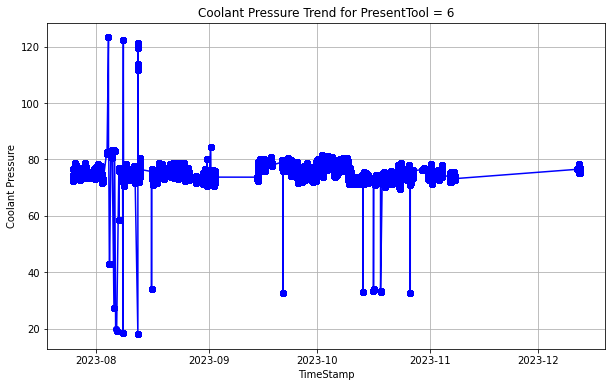

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CoolantPr'], marker='o', linestyle='-', color='b')
plt.title('Coolant Pressure Trend for PresentTool = 6')
plt.xlabel('TimeStamp')
plt.ylabel('Coolant Pressure')
plt.grid(True)
plt.show()

In [48]:
sql = """SELECT [PresentTool] ,[CoolantPr],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-07-25T00:00:47' AND '2023-12-12T09:45:58'
  AND [PresentTool] = 7 AND [CoolantPr]>0 ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)

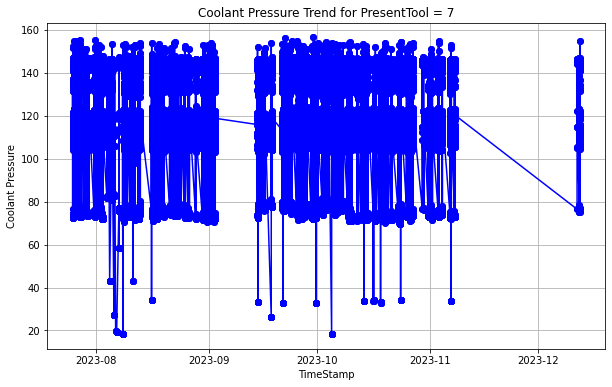

In [49]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CoolantPr'], marker='o', linestyle='-', color='b')
plt.title('Coolant Pressure Trend for PresentTool = 7')
plt.xlabel('TimeStamp')
plt.ylabel('Coolant Pressure')
plt.grid(True)
plt.show()

In [50]:
sql = """SELECT [PresentTool] ,[CoolantPr],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-07-25T00:00:47' AND '2023-12-12T09:45:58'
  AND [PresentTool] = 22 AND [CoolantPr]>0 ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)

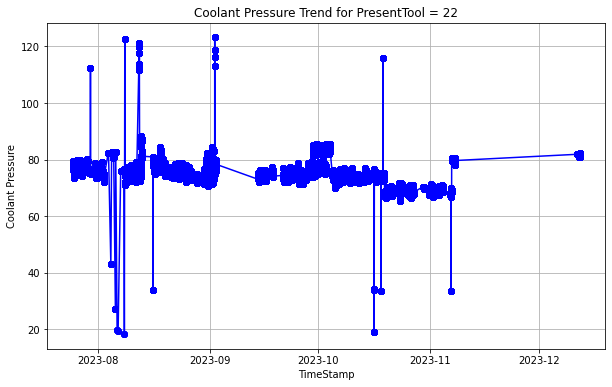

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CoolantPr'], marker='o', linestyle='-', color='b')
plt.title('Coolant Pressure Trend for PresentTool = 22')
plt.xlabel('TimeStamp')
plt.ylabel('Coolant Pressure')
plt.grid(True)
plt.show()

In [52]:
sql = """SELECT [PresentTool] ,[CoolantPr],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-07-25T00:00:47' AND '2023-12-12T09:45:58'
  AND [PresentTool] = 23 AND [CoolantPr]>0 ORDER BY 'TimeStamp'""" 
df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)

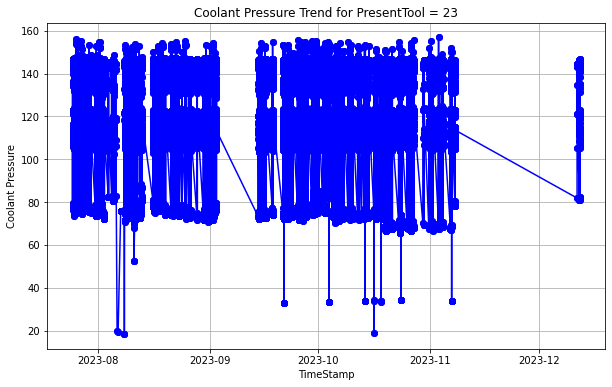

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CoolantPr'], marker='o', linestyle='-', color='b')
plt.title('Coolant Pressure Trend for PresentTool = 23')
plt.xlabel('TimeStamp')
plt.ylabel('Coolant Pressure')
plt.grid(True)
plt.show()

### Getting the latest time by running

In [13]:
import datetime  

current_time = datetime.datetime.now()

user_time = int(input("Enter the pasttime in minutes: "))
user_time = user_time*60

past_time = current_time - datetime.timedelta(seconds=user_time)
  
current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")


# param1 = str(input("Enter the Parameter: "))
# sql = f"SELECT [SP1TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
sql = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

# sql = f"SELECT [{param1}] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
df.head()

# df.plot(figsize=(20,10))

KeyboardInterrupt: Interrupted by user

### Time without user input

In [12]:
import datetime  

current_time = datetime.datetime.now()

user_time = int(input("Enter the pasttime in minutes: "))
user_time = user_time*60

past_time = current_time - datetime.timedelta(seconds=user_time)
  
current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")


# param1 = str(input("Enter the Parameter: "))
# sql = f"SELECT [SP1TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
sql = f"SELECT [SP1TEMP] ,[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

# sql = f"SELECT [{param1}] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
df.head()

# df.plot(figsize=(20,10))

Enter the pasttime in minutes: 10


,SP1TEMP
TimeStamp,
2023-11-10 11:55:20.117,27
2023-11-10 11:55:21.117,27
2023-11-10 11:55:22.117,27
2023-11-10 11:55:23.117,26
2023-11-10 11:55:24.117,26


### Converting the above query to .csv file

In [11]:
sql = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1]"

df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 626
Traceback (most recent call last):
  File "C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py", line 2018, in execute
    cur.execute(*args, **kwargs)
pyodbc.OperationalError: ('08S01', '[08S01] [Microsoft][SQL Server Native Client 11.0]TCP Provider: An existing connection was forcibly closed by the remote host.\r\n (10054) (SQLExecDirectW); [08S01] [Microsoft][SQL Server Native Client 11.0]Communication link failure (10054)')

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py", line 2022, in execute
    self.con.rollback()
pyodbc.OperationalError: ('08S01', '[08S01] [Microsoft][SQL Server Native Client 11.0]Communication link failure (-2147467259) (SQLEndTran)')

The above exception was the direct cause of the following exce

TypeError: object of type 'NoneType' has no len()

In [5]:
import pyodbc
import datetime 
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=na0vm00024.apac.bosch.com;"
                        "Database=DB_MFC2DB_SQL;"
                        "Trusted_Connection=yes;")

cursor = conn.cursor()

current_time = datetime.datetime.now()

user_time = int(input("Enter the pasttime in minutes: "))
user_time = user_time*60

past_time = current_time - datetime.timedelta(seconds=user_time)
  
current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")

sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
# sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-09-21T00:00:47' AND '2023-09-22T11:59:58' ORDER BY 'TimeStamp'"

cursor.execute(sql_query)

row = cursor.fetchone()


if row:
    Sp1_temp = row[0]
    sp2_temp = row[1]
    print(f"Live Spindle 1 temperature: {Sp1_temp}")
    print(f"Live Spindle 2 Temperature: {sp2_temp}")
else:
    print("No data found")

    
cursor.close()
conn.close()


Enter the pasttime in minutes: 10
Live Spindle 1 temperature: 28
Live Spindle 2 Temperature: 33


### Generating email alerts if live data crosses Thresold

In [57]:
import smtplib


global Sp1_temp = row[0]
global sp2_temp = row[1]

sp1temp_setpoint = 26
sp2temp_setpoint = 30

threshold = 2

if abs(Sp1_temp - sp1temp_setpoint) > threshold or abs(sp2_temp - sp2temp_setpoint) > threshold:
    FROM = "sandeep.chowdhury@in.bosch.com"
    TO = "sandeep.chowdhury@in.bosch.com"

    SUBJECT = "ALERT"
    TEXT = f'Sp1_temp is {Sp1_temp} and sp2_spindle temp is {Sp2_temp}'

    message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)

    server = smtplib.SMTP('rb-smtp-int.bosch.com')
    server.sendmail(FROM, TO, message)
    server.quit()
else:
    pass



SyntaxError: invalid syntax (Temp/ipykernel_20368/1224031306.py, line 4)

### Main Code

In [4]:
import pyodbc
import datetime 
import smtplib

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=na0vm00024.apac.bosch.com;"
                        "Database=DB_MFC2DB_SQL;"
                        "Trusted_Connection=yes;")

cursor = conn.cursor()

current_time = datetime.datetime.now()

user_time = int(input("Enter the pasttime in minutes: "))
user_time = user_time*60

past_time = current_time - datetime.timedelta(seconds=user_time)
  
current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")

sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
# sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-09-21T00:00:47' AND '2023-09-22T11:59:58' ORDER BY 'TimeStamp'"

cursor.execute(sql_query)

row = cursor.fetchone()


if row:
    Sp1_temp = row[0]
    sp2_temp = row[1]
    print(f"Live Spindle 1 temperature: {Sp1_temp}")
    print(f"Live Spindle 2 Temperature: {sp2_temp}")
else:
    print("No data found")
    


sp1temp_setpoint = 20
sp2temp_setpoint = 20

threshold = 2

if abs(Sp1_temp - sp1temp_setpoint) > threshold or abs(sp2_temp - sp2temp_setpoint) > threshold:
    FROM = "sandeep.chowdhury@in.bosch.com"
    TO = "sandeep.chowdhury@in.bosch.com"

    SUBJECT = "!! ALERT SPINDLE TEMP DZ9 !!"
    TEXT = f'Spindle Temp1 range: 25 to 27\nSpindle Temp1 range = 29 to 32\n\n\nLive Spindle 1 temperature: {Sp1_temp}\nLive Spindle 2 temperature: {sp2_temp}'

    message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)

    server = smtplib.SMTP('rb-smtp-int.bosch.com')
    server.sendmail(FROM, TO, message)
    server.quit()
else:
    pass

    
cursor.close()
conn.close()


Enter the pasttime in minutes: 10
Live Spindle 1 temperature: 26
Live Spindle 2 Temperature: 32


SMTPConnectError: (421, b'4.3.2 Service not available')

### Testing overall code with repeation condition

In [1]:
import time
import pyodbc
import datetime 
import smtplib

def fetch_live_data():
    conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=na0vm00024.apac.bosch.com;"
                        "Database=DB_MFC2DB_SQL;"
                        "Trusted_Connection=yes;")

    cursor = conn.cursor()

    current_time = datetime.datetime.now()

    user_time = int(input("Enter the pasttime in minutes: "))
    user_time = user_time*60

    past_time = current_time - datetime.timedelta(seconds=user_time)

    current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
    past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")

    sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
    # sql_query = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '2023-09-21T00:00:47' AND '2023-09-22T11:59:58' ORDER BY 'TimeStamp'"

    cursor.execute(sql_query)

    row = cursor.fetchone()


    if row:
        Sp1_temp = row[0]
        Sp2_temp = row[1]
        print(f"Live Spindle 1 temperature: {Sp1_temp}")
        print(f"Live Spindle 2 Temperature: {sp2_temp}")
    else:
        print("No data found")
        
        cursor.close()
        conn.close()
    
    return Sp1_temp, Sp2_temp    

    
while True:
    live_data = fetch_live_data()
    
    sp1temp_setpoint = 26
    sp2temp_setpoint = 30

    threshold = 2
    
    if abs(Sp1_temp - sp1temp_setpoint) > threshold or abs(sp2_temp - sp2temp_setpoint) > threshold:
        FROM = "sandeep.chowdhury@in.bosch.com"
        TO = "sandeep.chowdhury@in.bosch.com"

        SUBJECT = "!! ALERT SPINDLE TEMP DZ9 !!"
        TEXT = f'Spindle Temp1 range: 25 to 27\nSpindle Temp1 range = 29 to 32\n\n\nLive Spindle 1 temperature: {Sp1_temp}\nLive Spindle 2 temperature: {sp2_temp}'

        message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)

        server = smtplib.SMTP('rb-smtp-int.bosch.com')
        server.sendmail(FROM, TO, message)
        server.quit()
    else:
        pass

    time.sleep(30) 

Enter the pasttime in minutes: 10
Live Spindle 1 temperature: 29


NameError: name 'sp2_temp' is not defined

### Forecasting

In [304]:
train_data = df.iloc[:151]
test_data = df.iloc[150:]

In [305]:
train_data

,SP1TEMP
TimeStamp,
2023-09-21 17:02:48.983,51
2023-09-21 17:02:49.983,51
2023-09-21 17:02:50.983,52
2023-09-21 17:02:51.983,52
2023-09-21 17:02:52.983,53
...,...
2023-09-21 17:05:15.003,52
2023-09-21 17:05:16.003,52
2023-09-21 17:05:17.003,52


In [306]:
test_data

,SP1TEMP
TimeStamp,
2023-09-21 17:05:19.003,53
2023-09-21 17:05:20.003,53
2023-09-21 17:05:21.003,51
2023-09-21 17:05:22.003,51
2023-09-21 17:05:23.003,53
...,...
2023-09-21 17:12:43.097,51
2023-09-21 17:12:44.097,52
2023-09-21 17:12:45.097,52


In [307]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [308]:
fitted_model = ExponentialSmoothing(train_data['SP1TEMP'], trend ='mul', seasonal='mul', seasonal_periods=12).fit()
print(fitted_model)

In [309]:
test_predictions = fitted_model.forecast(36)

In [310]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions.columns

RangeIndex(start=0, stop=1, step=1)

<Axes: xlabel='TimeStamp'>

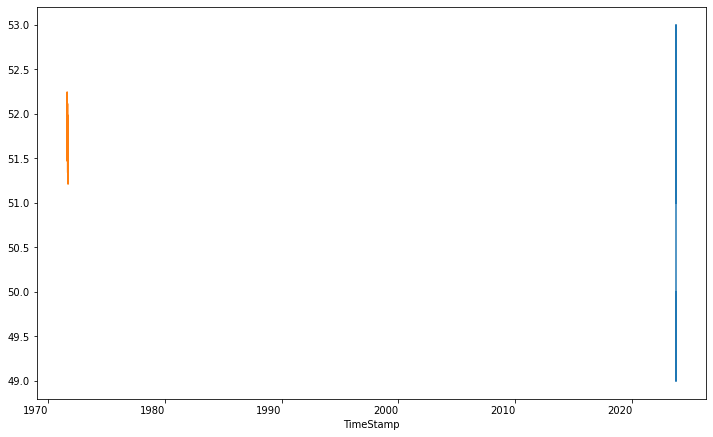

In [311]:
df['SP1TEMP'].plot(figsize=(12,8))
forecast_predictions.plot()

## SQL call with Sleep function

In [ ]:
import datetime  
current_time = datetime.datetime.now()

user_time = int(input("Enter the pasttime in minutes: "))
user_time = user_time*60

past_time = current_time - datetime.timedelta(seconds=user_time)
  
current_time = current_time.strftime("%Y-%m-%dT%H:%M:%S")
past_time = past_time.strftime("%Y-%m-%dT%H:%M:%S")


# param1 = str(input("Enter the Parameter: "))
# sql = f"SELECT [SP1TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"
sql = f"SELECT [SP1TEMP] ,[SP2TEMP],[TimeStamp] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

# sql = f"SELECT [{param1}] FROM [ChironDZ9_1] WHERE Timestamp BETWEEN '{past_time}' AND '{current_time}' ORDER BY 'TimeStamp'"

df = pd.read_sql_query(sql, cnxn, index_col="TimeStamp", parse_dates=True)
# df.head()

df.plot(figsize=(20,10))


# importing time module
import time


def message(string):

    for i in string:
        print(i, end="")
        time.sleep(.5)


# main function
if __name__ == '__main__':
    msg = "hello wold"
    message(msg)

### Mailer test

In [8]:
import smtplib


# Sp1_temp = 29
# sp2_temp = 35

# sp1temp_setpoint = 26
# sp2temp_setpoint = 30

threshold = 2

if 2>1:
    FROM = "sandeep.chowdhury@in.bosch.com"
    TO = "sandeep.chowdhury@in.bosch.com"

    SUBJECT = "ALERT"
    TEXT = f'Sp1_temp is x and sp2_spindle temp is y'

    message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)

#     server = smtplib.SMTP('rb-smtp-int.bosch.com')
    server = smtplib.SMTP('rb-smtp-int.bosch.com')
    server.sendmail(FROM, TO, message)
    server.quit()
else:
    pass


gaierror: [Errno 11001] getaddrinfo failed

In [26]:
import smtplib
from smtplib import SMTP
debuglevel=0

FROM = "chs9na@bosch.com"
TO = "chs9na@bosch.com"
PASSWORD = "********"

SUBJECT = "TEST"
TEXT = f'test test test'

message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)

try:
    server = smtplib.SMTP('rb-smtp-auth.rbesz01.com', 25)
    server.starttls() 
    server.login(FROM, PASSWORD)
    server.sendmail(FROM, TO, message)
    server.quit()
except Exception as e:
    print(e)